In [254]:
import scipy
from scipy.stats import chi2_contingency
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as mlab
import numpy as np

obs = np.array([[1, 3], [29, 7]])
chi2, p, dof, exp = chi2_contingency(obs, correction = False)
(chi2, p)

In [255]:
chi2, p, dof, exp = chi2_contingency(obs, correction = True)
(chi2, p)

In [256]:
math.log(p)

In [257]:
0

Quote: "Fisher's exact test" is somewhat of a misnomer. It is a test for comparing two proportions that is conditional on the marginal frequencies. The test is exact in guaranteeing that the type I error is less than or equal to what you specify. It can however be much less, i.e., P-values are too large and power is lost. In this sense ordinary chi-square tests are generally "more accurate" than "exact" tests. In addition, the old adage that chi-square tests are not accurate if an expected cell frequency is less than 5 is not correct.

In [258]:
oddsratio, pvalue = scipy.stats.fisher_exact(obs)
pvalue

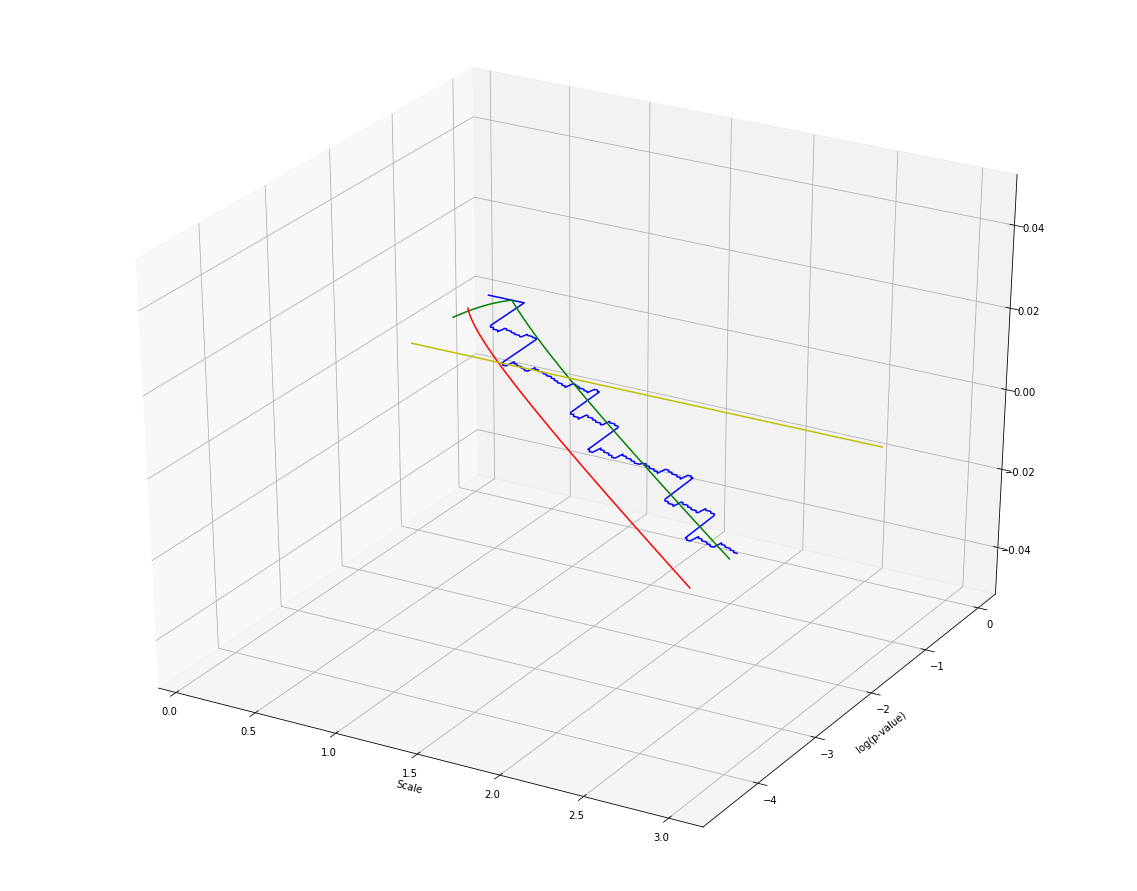

In [259]:
import math

def exact(scale):
    oddsratio, pvalue = scipy.stats.fisher_exact(obs*scale)
    return math.log10(pvalue)

def chi2(scale):
    chi2, p, dof, exp = chi2_contingency(obs*scale)
    return math.log10(p)

def chi2uncorrected(scale):
    chi2, p, dof, exp = chi2_contingency(obs*scale, correction=False)
    return math.log10(p)

import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0.1, 3., 0.01)

# red dashes, blue squares and green triangles
plt.plot(t, np.array([exact(xi) for xi in t]), 'b')
plt.plot(t, np.array([chi2(xi) for xi in t]), 'g')
plt.plot(t, np.array([chi2uncorrected(xi) for xi in t]), 'r')
plt.plot(t, np.array([math.log10(0.05) for xi in t]), 'y')
plt.xlabel("Scale")
plt.ylabel("log(p-value)")

plt.show()
    

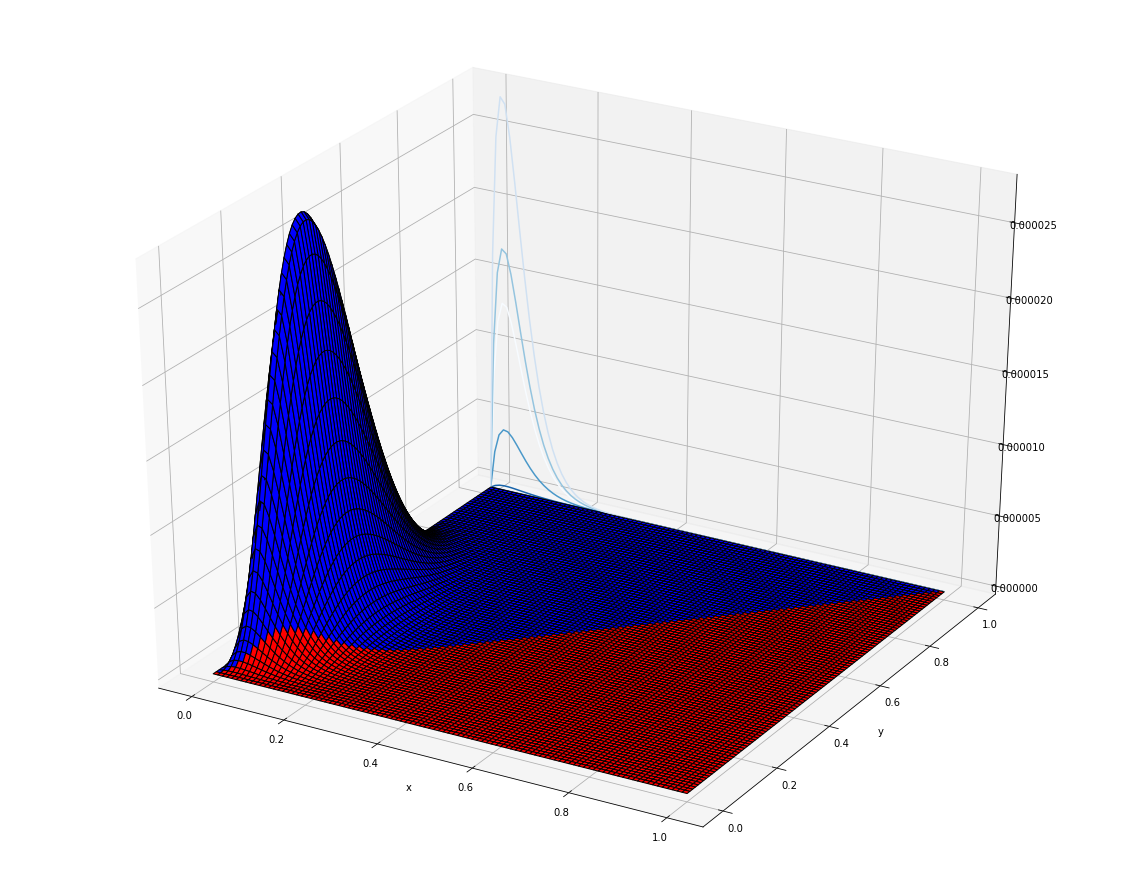

Probability:  0.9872656339373678


In [260]:
def likelihood(a_plus, b_plus):
    return a_plus * (1-a_plus)**29 * b_plus**3 * (1-b_plus)**7

from matplotlib import cm

def plot(ratio):
    fig = plt.figure(figsize=(20,16))
    ax = fig.gca(projection = '3d')
    dim = 100
    x = np.linspace(0, 1, dim)
    y = np.linspace(0, 1, dim)
    X, Y = np.meshgrid(x, y)
    Z = likelihood(X, Y)

    colors = np.empty(Z.shape, dtype=str)
    for ix in range(dim):
        for iy in range(dim):
            colors[iy, ix] = 'b' if (ix*ratio<iy) else 'r'

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    surf = ax.plot_surface(X, Y, Z, linewidth=1, rstride=1, facecolors = colors,   edgecolors='#000000',  cstride=1,  cmap='Blues')
    surf.set_edgecolor('k')
    ax.contour(X, Y, Z, zdir='y', offset=1, cmap='Blues')
    plt.show()

    region = 0
    total = 0
    dim=1000
    for _x in range(dim):
        for _y in range(dim):
            l = likelihood(_x/dim,_y/dim)
            total=total+l
            if (_x*ratio<_y): region=region+l


    print("Probability: ",region/total)

plot(1)


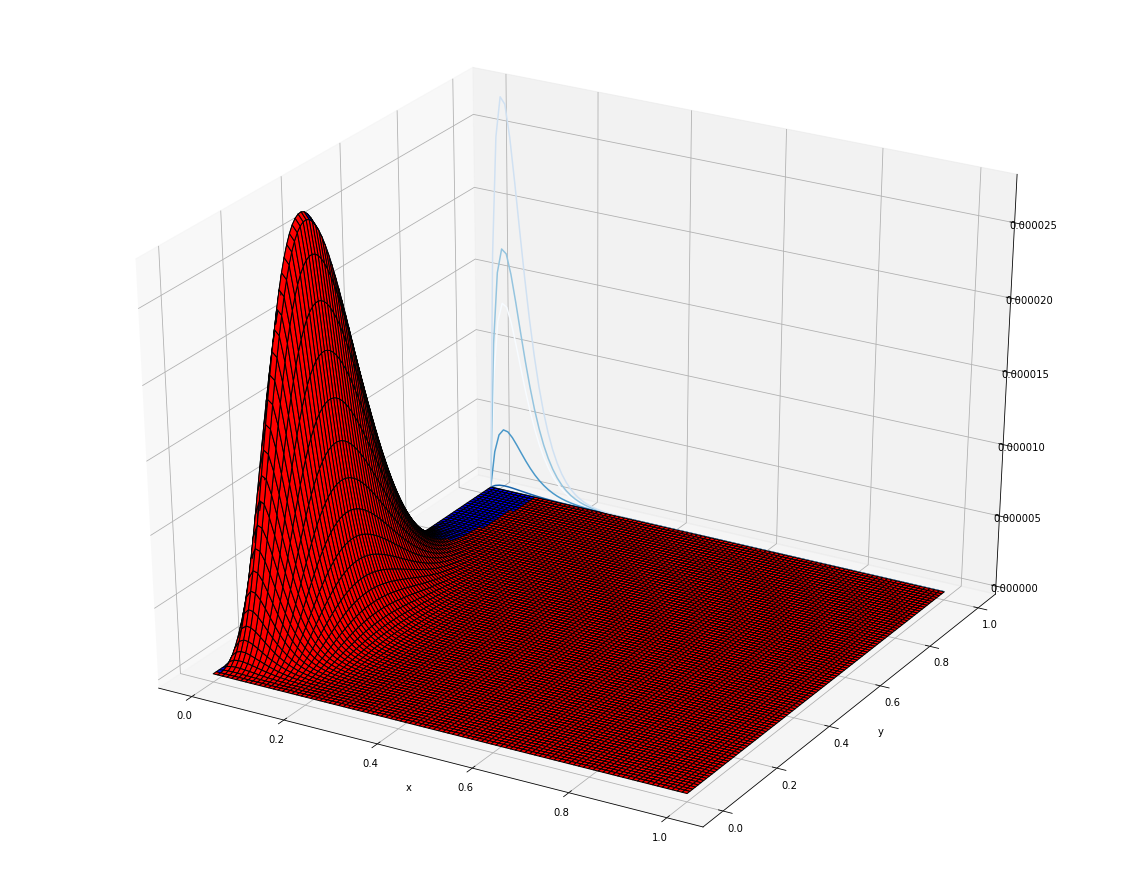

Probability:  0.2765728955450448


In [261]:
plot(10)


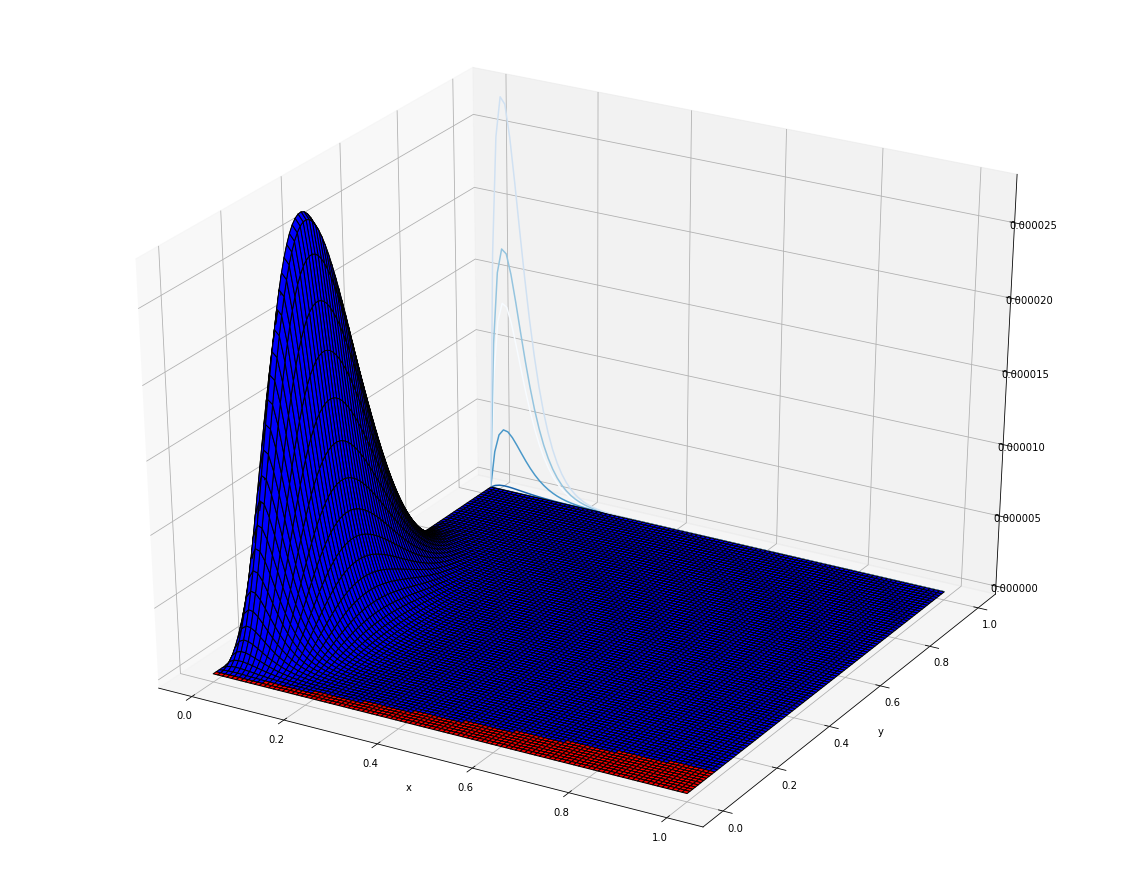

Probability:  0.9999970890317833


In [262]:
plot(0.1)

Indefinite integral:


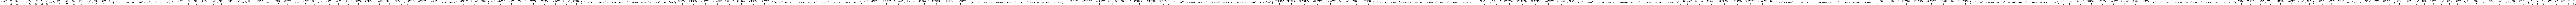

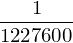

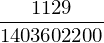

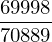

In [263]:
from sympy.functions import exp
from sympy import *
from IPython.display import display
init_printing(use_unicode=False, wrap_line=False, no_global=True)

a= Symbol('a')
b = Symbol('b')

def likelihood(a, b):
    return a * (1-a)**29 * b**3 * (1-b)**7

display(likelihood(a,b))
print ("Indefinite integral:")
display((integrate(likelihood(a,b), (a,0,b))))


sum=integrate(integrate(likelihood(a,b), (a,0,1)),(b,0,1))
display(sum)
region = integrate(integrate(likelihood(a,b), (a,0,b)),(b,0,1))
display(region)
display(region/sum)
N(region/sum)

$P(data | \lambda)=e^{-\lambda_f}{\frac {\lambda_f^{12}}{12!}} e^{-\lambda_s*0.5}{\frac {(\lambda_s*0.5)^{9}}{9!}}$



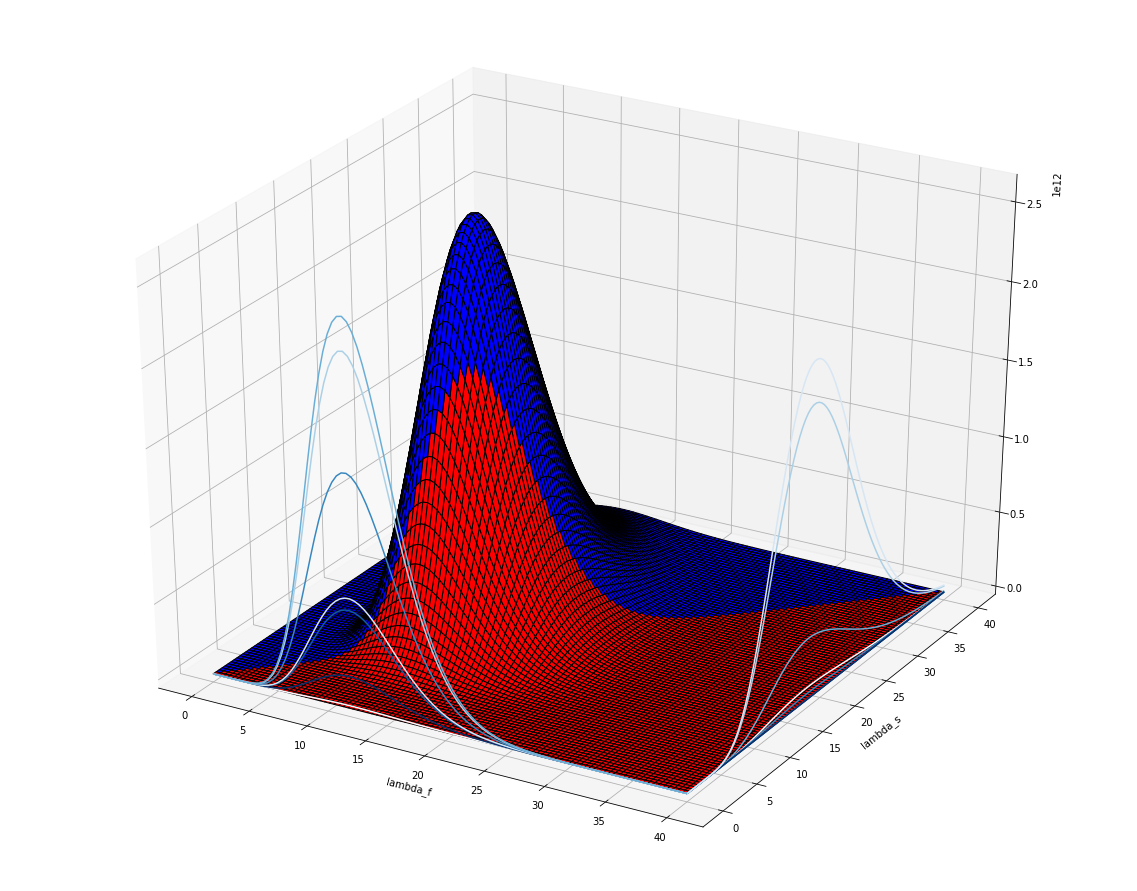

Probability of lambda_s greater than lambda_f 0.8344809206384475
lambda_s is [1.4,1.6] times greater than lambda_f, with 12.52% probability
lambda_s is [1.2,1.8] times greater than lambda_f, with 36.60% probability
lambda_s is [0.9999999999999999,2.0] times greater than lambda_f, with 58.09% probability
lambda_s is [0.7999999999999999,2.2] times greater than lambda_f, with 74.12% probability
lambda_s is [0.5999999999999999,2.4000000000000004] times greater than lambda_f, with 84.45% probability
lambda_s is [0.3999999999999997,2.6000000000000005] times greater than lambda_f, with 89.84% probability
lambda_s is [0.19999999999999973,2.8000000000000003] times greater than lambda_f, with 92.79% probability


In [290]:
def likelihood(lf, ls):
    return np.exp(-lf) * np.power(lf,12) * np.exp(-ls*0.5) * np.power(ls*0.5,9)

from matplotlib import cm

def plot2(ratio):
    fig = plt.figure(figsize=(20,16))
    ax = fig.gca(projection = '3d')
    dim = 100
    x = np.linspace(0, 40, dim)
    y = np.linspace(0, 40, dim)
    X, Y = np.meshgrid(x, y)
    Z = likelihood(X, Y)

    colors = np.empty(Z.shape, dtype=str)
    for ix in range(dim):
        for iy in range(dim):
            colors[iy, ix] = 'b' if (ix*ratio<iy) else 'r'

    ax.set_xlabel('lambda_f')
    ax.set_ylabel('lambda_s')
    surf = ax.plot_surface(X, Y, Z, linewidth=1, rstride=1, facecolors = colors,   edgecolors='#000000',  cstride=1,  cmap='Blues')
    surf.set_edgecolor('k')
    ax.contour(X, Y, Z, zdir='y', offset=0, cmap='Blues')
    ax.contour(X, Y, Z, zdir='x', offset=40, cmap='Blues')
    
    plt.show()

def calc(ratio):
    region = 0
    total = 0
    dim=500
    for _x in range(dim):
        for _y in range(dim):
            l = likelihood(_x*40/dim,_y*40/dim)
            total=total+l
            if (_x*ratio<_y): region=region+l

    return region/total

plot2(1)
print("Probability of lambda_s greater than lambda_f", calc(1));

for i in np.arange(0.1, 1.5, 0.2): 
    a = calc(1.5-i)-calc(1.5+i)
    print("lambda_s is ["+ str(1.5-i)+ "," + str(1.5+i) +"] times greater than lambda_f, with " +( "%.2f" % (a*100.0)) + "% probability");